# Чтение и запись в файл

В самом простом случае для чтения файла используется функция open(), первым аргументом является путь (относительный или абсолютный), вторым - режим работы с файлом. Режимы работы: r - прочитать, w - создать и записать, a - дозапись в конец файла, + - чтение и запись. При этом создаётся объект, который необходимо прочитать методом read(), чтобы увидеть содержимое файла. После работы с файлом его необходимо закрыть методом close(), чтобы удалить его из оперативной памяти компьютера

In [30]:
f = open('sample1.txt', 'r')
f

<_io.TextIOWrapper name='sample1.txt' mode='r' encoding='cp1251'>

In [31]:
print(f.read())
f.close()

text1text1text1text1


In [32]:
f = open('sample1.txt', 'a')
f.write("text1")

5

In [41]:
f = open("sample1.txt", "w")
f.write("new\ntext")
f.close()

In [44]:
f = open('sample1.txt')
for i in f:
    print(i)
f.close()

new

text


### Задача: создайте файл и напишите в нём в две строки текст(1,2). Потом откройте файл на дозапись и дополните последней строкой (3). Далее откройте и прочитайте файл, после закройте

In [18]:
import os
os.getcwd()

file = open("practice3.txt", "w")

file.write("1\n")
file.write("2\n")
file.close()

file = open("practice3.txt", "a")
file.write("3\n")
file.close()

file = open('practice3.txt', 'r')
file.read()

'1\n2\n3\n'

## With open as - менеджер контекста

Менеджеры контекста позволяют выделять и освобождать ресурсы строго по необходимости. Самый популярный пример использования менеджера контекста - выражение with

In [4]:
with open('sample1.txt', "w") as f:
    for i in range(1,5):
        f.write("text1\n")

In [5]:
f = open('sample1.txt', 'r')
print(f.read())
f.close()

text1
text1
text1
text1



In [8]:
with open("sample1.txt", "a") as file: 
    file.write("\nsome text2")

f = open('sample1.txt', 'r')
print(f.read())
f.close()

text1
text1
text1
text1

some text2
some text2


## Работа со строками в файлах

In [9]:
with open("sample1.txt", "r") as file:
    for line in file:
        print(line)

text1

text1

text1

text1



some text2

some text2


In [10]:
with open("sample1.txt", "r") as file: #readline() считывает одну строку из файла
    str1 = file.readline()
    print(str1, end="")
    str2 = file.readline()
    print(str2)

text1
text1



In [12]:
with open("sample1.txt", "r") as file: #read() считывает все содержимое файла в одну строку
    print(file.read())

text1
text1
text1
text1

some text2
some text2


In [13]:
with open("sample1.txt", "r") as file: #readlines() считывает все строки файла в список
    print(file.readlines())

['text1\n', 'text1\n', 'text1\n', 'text1\n', '\n', 'some text2\n', 'some text2']


### Создайте файл и запишите в него сто чисел (от 50 до 150) каждое на отдельной строке. Далее поместите все числа в список (rstrip() - удалить \n). Список отфильтруйте по числам, которые деляться на 3 без остатка. Дозапишите значения нового списка в файл (на строку по 3 числа). Используйте три разных способа открытия файла (w, r, a)

In [21]:
with open('practice3.txt', 'w') as file:
    for i in range(50, 151):
        text = str(i) + "\n"
        file.write(text)
        
with open('practice3.txt', 'r') as file:
    print(file.read())

50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150



## Открыть файл прочих форматов

In [14]:
import csv

with open("sample2.csv", 'r+') as file:
    csvreader = csv.reader(file) #создать объект читателя
    for row in csvreader:
        print(row)
        
    writer = csv.writer(file) #создать объект писателя
    writer.writerow(["id_3", "param_1", "param_2", "param_3", "param_4", "param_5"])

['id_1', 'param_1', 'param_2', 'param_3', 'param_4', 'param_5']
['id_2', 'param_1', 'param_2', 'param_3', 'param_4', 'param_5']
['id_3', 'param_1', 'param_2', 'param_3', 'param_4', 'param_5']
[]


# Работа с библиотекой Pandas

In [4]:
import pandas as pd


import warnings
warnings.filterwarnings('ignore')

Pandas Series — это одномерный массив. Визуально он похож на пронумерованный список: слева в колонне находятся индексы элементов, а справа — сами элементы

In [47]:
series = pd.Series([1,2,3,4,5]) #создание ряда из списка
series

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [48]:
series = pd.Series([1,2,3,4,5], index=["a", "b", "c", "d", "e"]) #явно заданные индексы
series

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [49]:
[series > 4] #фильтрация элементов

[a    False
 b    False
 c    False
 d    False
 e     True
 dtype: bool]

In [50]:
series[series > 4] #вывод отфильтрованных элементов

e    5
dtype: int64

Pandas DataFrame — это двумерный массив, похожий на таблицу Excel. В нем можно проводить такие же манипуляции с данными: объединять в группы, сортировать по определенному признаку, производить вычисления. Как любая таблица, датафрейм состоит из столбцов и строк, причем столбцами будут уже известные объекты — Series

In [51]:
df = pd.DataFrame({"PARAM_1": [34, 43, 54, 65, 23], "PARAM_2": [19.23, 35.3, 23.4, 32.4, 43.6]}, 
                  index=["id_1", "id_2", "id_3", "id_4", "id_5"])
df

,PARAM_1,PARAM_2
id_1,34,19.23
id_2,43,35.30
id_3,54,23.40
id_4,65,32.40
id_5,23,43.60


Данные для тренировки можно загружать из сторонних библиотек - sclearn. Например, следующий датасет является игрушечным датасетом для тренировки в машинном обучении. Датасет представляет собой набор 30 числовых признаков и таргетную переменную, которая является предсказателем - имеется ли рак груди у пациента

In [3]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import csv

In [4]:
cancer = load_breast_cancer()
df =  pd.DataFrame(cancer.data, columns=[cancer.feature_names])
df['target'] = cancer.target

In [5]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


Также можно загрузить датасет стандартной утилитой, если датасет есть на компьютере

In [55]:
df = pd.read_csv("cancer.csv", index_col=0)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.26540,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.18600,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.24300,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.25750,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.16250,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039,1.0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.16540,0.36820,0.2678,0.15560,0.3196,0.11510,0.0


In [56]:
df[df['target'] == 1]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,1.0
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,1.0
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,1.0
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1.0
46,8.196,16.84,51.71,201.9,0.08600,0.05943,NaN,NaN,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,...,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732,1.0
560,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321,1.0
561,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,...,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905,1.0
568,7.760,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.00000,0.00000,0.2871,0.07039,1.0


Доступ/срез по некоторым условия задаются с помощью методов loc и iloc

In [57]:
df.loc[20] #loc - доступ по строковой метке

mean radius                 13.080000
mean texture                15.710000
mean perimeter              85.630000
mean area                  520.000000
mean smoothness              0.107500
mean compactness             0.127000
mean concavity               0.045680
mean concave points          0.031100
mean symmetry                0.196700
mean fractal dimension       0.068110
radius error                 0.185200
texture error                0.747700
perimeter error              1.383000
area error                  14.670000
smoothness error             0.004097
compactness error            0.018980
concavity error              0.016980
concave points error         0.006490
symmetry error               0.016780
fractal dimension error      0.002425
worst radius                14.500000
worst texture               20.490000
worst perimeter             96.090000
worst area                 630.500000
worst smoothness             0.131200
worst compactness            0.277600
worst concav

In [58]:
df.loc[[20]]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
20,13.08,15.71,85.63,520.0,0.1075,0.127,0.04568,0.0311,0.1967,0.06811,...,20.49,96.09,630.5,0.1312,0.2776,0.189,0.07283,0.3184,0.08183,1.0


In [59]:
df.iloc[20] #iloc - доступ по числовому значению (начиная от 0)

mean radius                 13.080000
mean texture                15.710000
mean perimeter              85.630000
mean area                  520.000000
mean smoothness              0.107500
mean compactness             0.127000
mean concavity               0.045680
mean concave points          0.031100
mean symmetry                0.196700
mean fractal dimension       0.068110
radius error                 0.185200
texture error                0.747700
perimeter error              1.383000
area error                  14.670000
smoothness error             0.004097
compactness error            0.018980
concavity error              0.016980
concave points error         0.006490
symmetry error               0.016780
fractal dimension error      0.002425
worst radius                14.500000
worst texture               20.490000
worst perimeter             96.090000
worst area                 630.500000
worst smoothness             0.131200
worst compactness            0.277600
worst concav

In [60]:
df.iloc[[10,12,15,20], 3] #просмотр элементов c индексами (10,12,15,20) по 4 колоне

10     797.8
12    1123.0
15     658.8
20     520.0
Name: mean area, dtype: float64

In [61]:
df.iloc[:100, [3,4]]

,mean area,mean smoothness
0,1001.0,0.11840
1,1326.0,0.08474
2,1203.0,0.10960
3,386.1,0.14250
4,1297.0,0.10030
...,...,...
95,1264.0,0.09078
96,451.1,0.10450
97,294.5,0.10240
98,412.6,0.08983


In [62]:
df.iloc[lambda x: x.index % 3 == 0]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.26540,0.4601,0.11890,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.25750,0.6638,0.17300,0.0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.14420,0.25760,0.3784,0.19320,0.3063,0.08368,0.0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.18530,1.05800,1.1050,0.22100,0.4366,0.20750,0.0
12,19.17,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.2397,0.07800,...,29.94,151.70,1332.0,0.10370,0.39030,0.3639,0.17670,0.3176,0.10230,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,10.29,27.61,65.67,321.4,0.09030,0.07658,0.05999,0.02738,0.1593,0.06127,...,34.91,69.57,357.6,0.13840,0.17100,0.2000,0.09127,0.2226,0.08283,1.0
558,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,0.1454,0.06147,...,27.27,105.90,733.5,0.10260,0.31710,0.3662,0.11050,0.2258,0.08004,1.0
561,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,...,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905,1.0
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115,NaN


In [63]:
df.loc[:100, ["mean radius", "worst symmetry"]]

,mean radius,worst symmetry
0,17.990,0.4601
1,20.570,0.2750
2,19.690,0.3613
3,11.420,0.6638
4,20.290,0.2364
...,...,...
96,12.180,0.2227
97,9.787,0.1934
98,11.600,0.2772
99,14.420,0.2718


### С помощью loc/iloc покажите часть датафрейма с worst texture больше 29 по первым 100 пациентам

In [30]:
a = df.iloc[:, 21].iloc[:100]
a.loc[lambda x: x > 29]

('worst texture',)


8     30.73
9     40.68
10    33.88
12    29.94
14    32.01
15    37.13
16    30.88
17    31.48
18    30.88
23    35.59
24    31.56
26    33.21
28    36.71
30    34.01
32    32.09
33    30.90
35    29.02
36    30.36
40    30.25
41    35.34
42    33.17
44    29.89
49    31.82
54    31.69
57    30.70
62    29.51
64    33.47
65    33.39
66    31.56
72    33.82
78    31.72
80    32.16
82    33.62
83    32.72
86    29.25
87    30.41
88    30.50
90    29.11
95    31.59
99    30.86
Name: (worst texture,), dtype: float64

In [96]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

Метод describe() позволяет увидеть основные статистики датафрейма (среднюю, стандартное отклонение, максимальное значение, значение квантилей)

In [97]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,566.000000,566.000000,566.000000,563.000000,562.000000,562.000000,558.000000,553.000000,555.000000,561.000000,...,556.000000,559.000000,558.000000,561.000000,562.000000,563.000000,565.000000,566.000000,567.000000,539.000000
mean,15.840664,19.287668,91.999664,654.950266,0.096358,0.104247,0.089173,0.049126,0.181343,0.062825,...,25.652878,107.355367,880.917742,0.132437,0.254759,0.272314,0.114807,0.290058,0.083946,0.630798
std,10.996546,4.304173,24.306292,352.501685,0.014102,0.052976,0.080053,0.038953,0.027436,0.007090,...,6.163513,33.739928,571.881447,0.022814,0.158153,0.209378,0.065726,0.062008,0.018084,0.483037
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.740000,16.172500,75.180000,420.050000,0.086130,0.063945,0.029500,0.020310,0.162000,0.057700,...,21.095000,84.135000,514.325000,0.116600,0.146300,0.114450,0.064930,0.250250,0.071365,0.000000
50%,13.460000,18.850000,86.290000,551.700000,0.095930,0.092525,0.061680,0.033840,0.179300,0.061550,...,25.370000,97.660000,685.550000,0.131300,0.213000,0.226000,0.099930,0.282050,0.080040,1.000000
75%,16.167500,21.795000,104.025000,782.650000,0.105300,0.130400,0.131600,0.074040,0.195700,0.066120,...,29.547500,125.650000,1080.500000,0.146000,0.341175,0.385300,0.162500,0.317825,0.092070,1.000000
max,100.000000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


Первоочередной задачей работой с данными является поиск и удаление дубликатов. Дубликаты неиформативны и несут угрозу статистической достоверности данным. Метод duplicated() позволяет получить маску, которая отражает наличие дубликатов

In [98]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool

In [99]:
df[df.duplicated()]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target


drop_duplicates() - удаляет все дубликаты в датафрейме

In [100]:
df = df.drop_duplicates()
df.shape

(569, 31)

In [101]:
df[df.duplicated()]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target


## Data Preparation и Data Cleaning

модуль missingno позволяет визуально просматривать пропуси в датафрейме

In [102]:
import missingno as msno

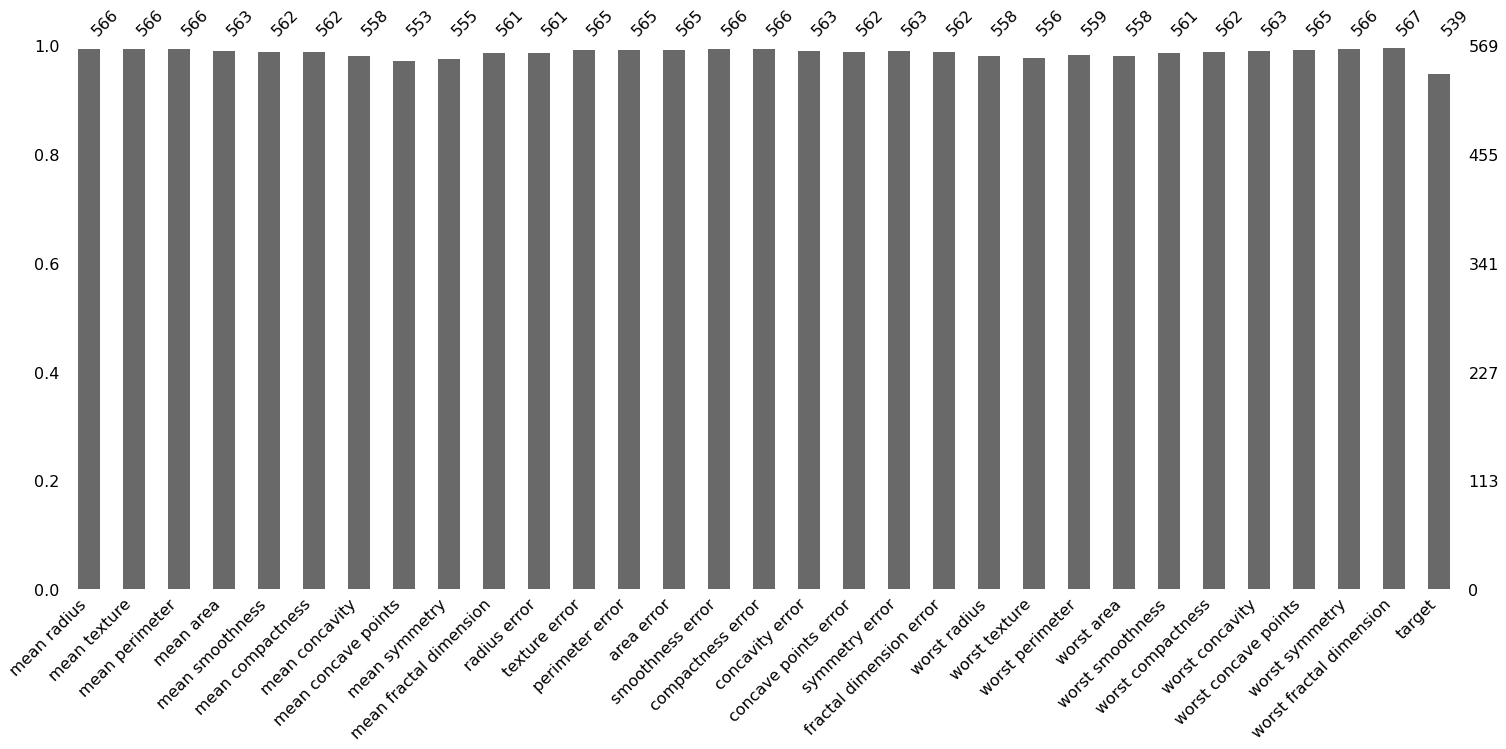

In [103]:
msno.bar(df); #диаграмма проседающих колон

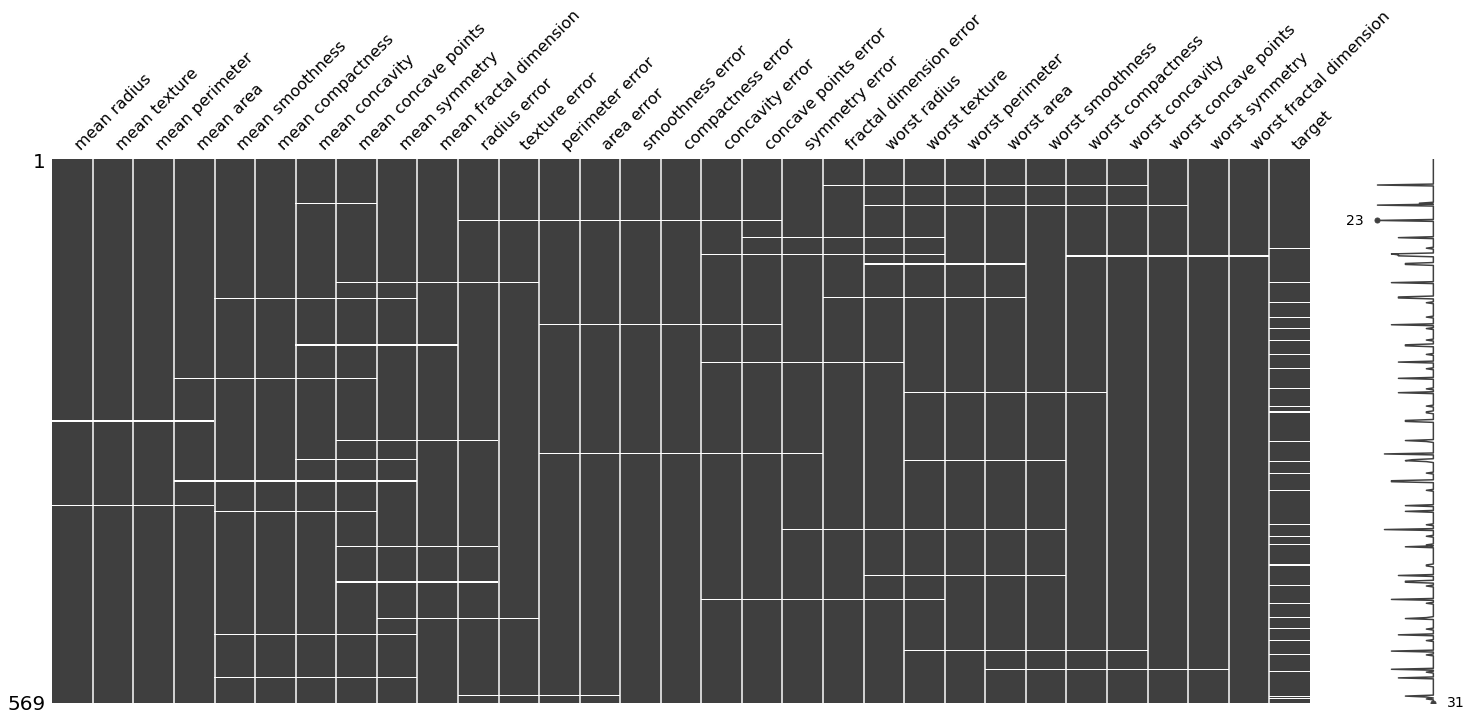

In [104]:
msno.matrix(df); #матрица пропусков, которая повторяет структуру данных

In [105]:
df[df["target"].isna()] #возвращает элементы из таблицы с пропущеннами значениями

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
93,13.450,18.30,86.60,555.1,0.10220,0.08165,0.039740,0.027800,0.1638,0.05710,...,25.94,97.59,699.4,0.13390,0.17510,0.13810,0.07911,0.2678,0.06603,NaN
129,19.790,25.12,130.40,1192.0,0.10150,0.15890,0.254500,NaN,NaN,NaN,...,33.58,148.70,1589.0,0.12750,0.38610,0.56730,0.17320,0.3305,0.08465,NaN
150,13.000,20.78,83.51,519.4,0.11350,0.07589,0.031360,0.026450,0.2540,0.06087,...,24.11,90.82,616.7,0.12970,0.11050,0.08112,0.06296,0.3196,0.06435,NaN
165,14.970,19.76,95.50,690.2,0.08421,0.05352,0.019470,0.019390,0.1515,0.05266,...,25.82,102.30,782.1,0.10450,0.09995,0.07750,0.05754,0.2646,0.06085,NaN
177,16.460,20.11,109.30,832.9,0.09831,0.15560,0.179300,0.088660,0.1794,0.06323,...,28.45,123.50,981.2,0.14150,0.46670,0.58620,0.20350,0.3054,0.09519,NaN
189,12.300,15.90,78.83,463.7,0.08080,0.07253,0.038440,0.016540,0.1667,0.05474,...,19.59,86.65,546.7,0.10960,0.16500,0.14230,0.04815,0.2482,0.06306,NaN
204,12.470,18.60,81.09,481.9,0.09965,0.10580,0.080050,0.038210,0.1925,0.06373,...,24.64,96.05,677.9,0.14260,0.23780,0.26710,0.10150,0.3014,0.08750,NaN
219,19.530,32.47,128.00,1223.0,0.08420,0.11300,0.114500,0.066370,0.1428,0.05313,...,45.41,180.20,2477.0,0.14080,0.40970,0.39950,0.16250,0.2713,0.07568,NaN
240,13.640,15.60,87.38,575.3,0.09423,0.06630,0.047050,0.037310,0.1717,0.05660,...,19.05,94.11,683.4,0.12780,0.12910,0.15330,0.09222,0.2530,0.06510,NaN
258,15.660,23.20,110.20,773.5,0.11090,0.31140,0.317600,0.137700,0.2495,0.08104,...,31.64,143.70,1226.0,0.15040,0.51720,0.61810,0.24620,0.3277,0.10190,NaN


In [106]:
missing_values = ((df.isna().sum() / len(df)) * 100).sort_values() #процент пропущенных значений по каждой колоне
print('Процент пропущенных значений:')
missing_values

Процент пропущенных значений:


worst fractal dimension    0.351494
mean radius                0.527241
worst symmetry             0.527241
smoothness error           0.527241
compactness error          0.527241
mean texture               0.527241
mean perimeter             0.527241
worst concave points       0.702988
texture error              0.702988
perimeter error            0.702988
area error                 0.702988
worst concavity            1.054482
mean area                  1.054482
concavity error            1.054482
symmetry error             1.054482
mean compactness           1.230228
worst compactness          1.230228
fractal dimension error    1.230228
concave points error       1.230228
mean smoothness            1.230228
radius error               1.405975
worst smoothness           1.405975
mean fractal dimension     1.405975
worst perimeter            1.757469
worst radius               1.933216
worst area                 1.933216
mean concavity             1.933216
worst texture              2

В target пропущено большое количество элементов, их статистически не заполнишь и предугадать пока нельзя. Поэтому лучший и единственный способ - удалить строки с пропущенными таргетами

In [1]:
df_clean = df[df["target"].notna()]

NameError: name 'df' is not defined

<AxesSubplot: >

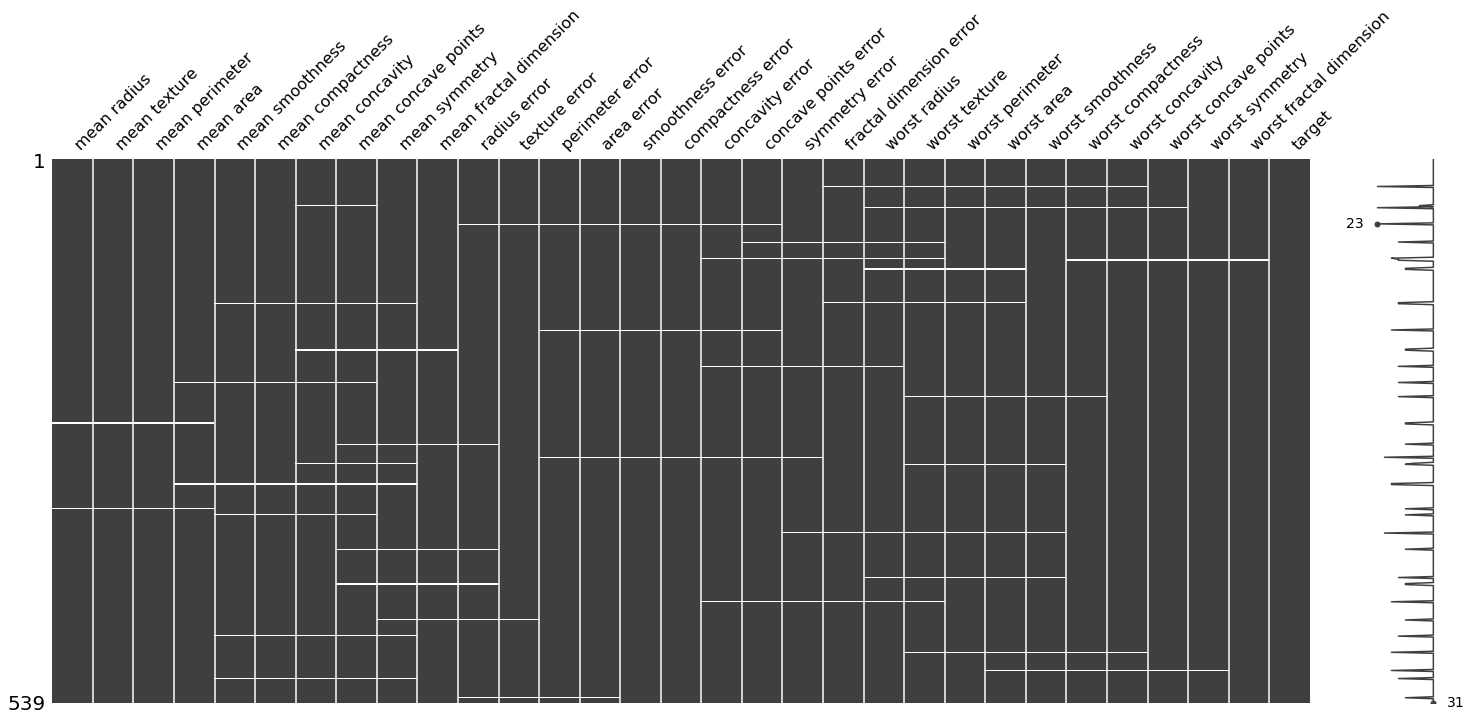

In [108]:
msno.matrix(df_clean)

Распределение и выбросы можно просмотреть визуально с помощью, например, бокс-плотов

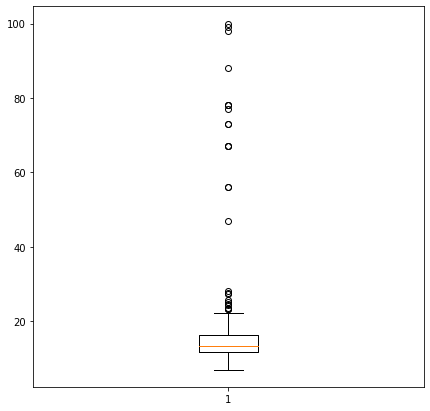

In [109]:
import matplotlib.pyplot as plt 
import numpy as np


data = df_clean['mean radius'][df_clean['mean radius'].notna()]

fig = plt.figure(figsize = (7, 7)) #размеры графика

plt.boxplot(data) #объявление типа графика и наполнение его данными
 
plt.show() #отрисовка графика

### Напишите код, который для каждой колоны нарисует бокс-плот

[('mean radius',), ('mean texture',), ('mean perimeter',), ('mean area',), ('mean smoothness',), ('mean compactness',), ('mean concavity',), ('mean concave points',), ('mean symmetry',), ('mean fractal dimension',), ('radius error',), ('texture error',), ('perimeter error',), ('area error',), ('smoothness error',), ('compactness error',), ('concavity error',), ('concave points error',), ('symmetry error',), ('fractal dimension error',), ('worst radius',), ('worst texture',), ('worst perimeter',), ('worst area',), ('worst smoothness',), ('worst compactness',), ('worst concavity',), ('worst concave points',), ('worst symmetry',), ('worst fractal dimension',), ('target',)]


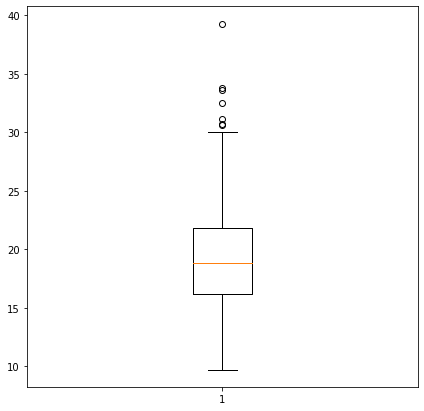

In [65]:
#fig = plt.figure(figsize = (80, 10))
#df.boxplot(column=column_list)

import matplotlib.pyplot as plt 
import numpy as np
column_list = list(df.columns)
print(column_list)
data = df[column_list[1]]

fig = plt.figure(figsize = (7, 7)) #размеры графика

plt.boxplot(data) #объявление типа графика и наполнение его данными
 
plt.show() #отрисовка графика

Рассмотрим подробнее боксплоты и найдём явные выбросы, условимся, что нас явно не устраивает колона mean radius и texture error. Можно ближе проанализировать статистики отдельных колон, например, mean radius и убедиться, что значения максимальные действительно выбиваются

In [111]:
df_clean['mean radius'].describe()

count    536.000000
mean      15.883291
std       11.271559
min        6.981000
25%       11.687500
50%       13.435000
75%       16.130000
max      100.000000
Name: mean radius, dtype: float64

В случае, если значений отсутствует немного их вполне можно заменить на среднюю, медиану, моду и тд. Давайте заменим значения выбросов на среднее значение по колоне без учёта выбросов

In [69]:
scale_mean = df_clean['mean radius'][df_clean['mean radius'] < 40].mean() #посчитаем среднее значение без выбросов
scale_mean

mean radius   NaN
dtype: float64

In [70]:
df_clean['mean radius'][df_clean['mean radius'] > 40] = scale_mean #заменив выбросы на среднее значение
df_clean

/tmp/ipykernel_5408/985024911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['mean radius'][df_clean['mean radius'] > 40] = scale_mean #заменив выбросы на среднее значение


ValueError: Must specify axis=0 or 1

In [66]:
data = df_clean['mean radius'][df_clean['mean radius'].notna()]
fig = plt.figure(figsize = (7, 7))
plt.boxplot(data)
plt.show() 

NameError: name 'df_clean' is not defined

### Замените значения в texture error аналогичным образом на моду и нарисуйте боксплот

Предположим, что остальные данные имеют нормальное распределение и нет необходимости удалять выбросы. Следующим этапом является заполнение пропусков. Для этого можно указать метод fillna(), который заполнит пропуски нужным значеним (средняя, мода и тд)

<AxesSubplot: >

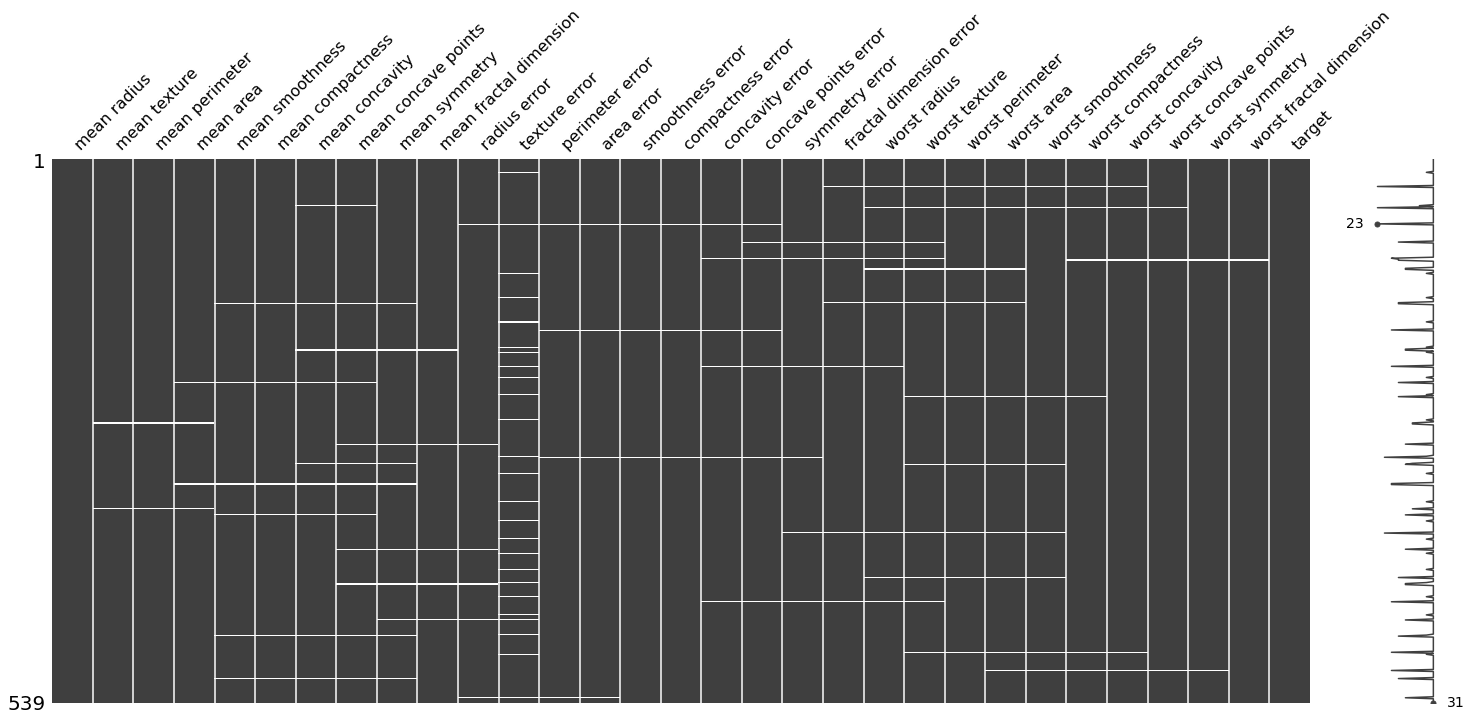

In [121]:
msno.matrix(df_clean)

In [119]:
#заменим отсутствующие значения на моду
df_clean['mean radius'] = df_clean['mean radius'].fillna(df_clean['mean radius'].mode()[0])

### Напишите скрипт, который в каждой колоне заменит пропущенное значение на среднее значение

## Сохранение датафрейма

In [125]:
df_clean.to_csv("clean_canser.csv") #сохранение в csv

# Визуализация данных

До этого мы с вами рассматривали визуализацию относительного одного параметра, смотрели его статистику. Однако визуализация также применяется также для поиска корреляций, что помогает находить важные зависимости

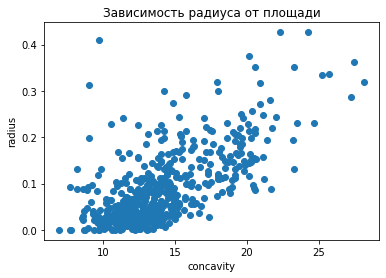

In [127]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(df_clean['mean radius'], df_clean['mean concavity'])
plt.title("Зависимость радиуса от площади")
plt.xlabel("concavity")
plt.ylabel("radius")
plt.show()

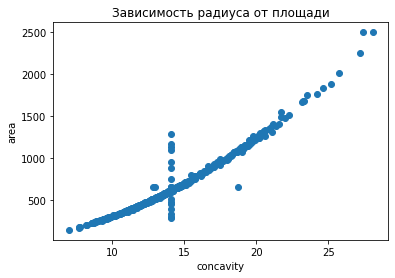

In [129]:
plt.scatter(df_clean['mean radius'], df_clean['mean area'])
plt.title("Зависимость радиуса от площади")
plt.xlabel("concavity")
plt.ylabel("area")
plt.show()

In [130]:
df_clean.corr()

,Unnamed: 0,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
Unnamed: 0,1.000000,-0.095729,0.063194,-0.113756,-0.097806,-0.173858,-0.175936,-0.186496,-0.194466,-0.186734,...,0.006211,-0.155388,-0.143091,-0.176659,-0.204421,-0.199691,-0.225484,-0.255601,-0.170438,0.308081
mean radius,-0.095729,1.000000,0.309604,0.982962,0.971656,0.170584,0.513812,0.663646,0.801529,0.183478,...,0.266301,0.948156,0.927843,0.121886,0.410241,0.521041,0.727874,0.175275,0.014312,-0.708080
mean texture,0.063194,0.309604,1.000000,0.313493,0.304335,-0.030121,0.220718,0.276280,0.267259,0.067014,...,0.896398,0.328123,0.310959,0.062878,0.252782,0.267614,0.266860,0.097241,0.102486,-0.393381
mean perimeter,-0.113756,0.982962,0.313493,1.000000,0.984973,0.213776,0.566754,0.710900,0.843374,0.207745,...,0.271167,0.962906,0.936855,0.152091,0.451845,0.559244,0.762706,0.195242,0.053677,-0.736848
mean area,-0.097806,0.971656,0.304335,0.984973,1.000000,0.185933,0.513806,0.687088,0.820283,0.177732,...,0.252536,0.948418,0.949785,0.125368,0.387852,0.512134,0.714568,0.148304,0.007838,-0.702912
mean smoothness,-0.173858,0.170584,-0.030121,0.213776,0.185933,1.000000,0.665717,0.530196,0.560339,0.547730,...,0.025682,0.245948,0.221213,0.799032,0.481181,0.448695,0.519866,0.390070,0.500719,-0.358752
mean compactness,-0.175936,0.513812,0.220718,0.566754,0.513806,0.665717,1.000000,0.881728,0.830153,0.613190,...,0.219268,0.599011,0.527782,0.561425,0.861338,0.817312,0.817050,0.508276,0.681610,-0.589940
mean concavity,-0.186496,0.663646,0.276280,0.710900,0.687088,0.530196,0.881728,1.000000,0.917056,0.513845,...,0.260584,0.722578,0.679437,0.444385,0.742613,0.875147,0.847332,0.412414,0.512548,-0.675939
mean concave points,-0.194466,0.801529,0.267259,0.843374,0.820283,0.560339,0.830153,0.917056,1.000000,0.477828,...,0.249934,0.845409,0.805889,0.445843,0.654643,0.738647,0.893400,0.376682,0.365296,-0.758805
mean symmetry,-0.186734,0.183478,0.067014,0.207745,0.177732,0.547730,0.613190,0.513845,0.477828,1.000000,...,0.083032,0.235700,0.194414,0.421278,0.491232,0.451291,0.450504,0.696816,0.442169,-0.336708


In [131]:
import seaborn as sns

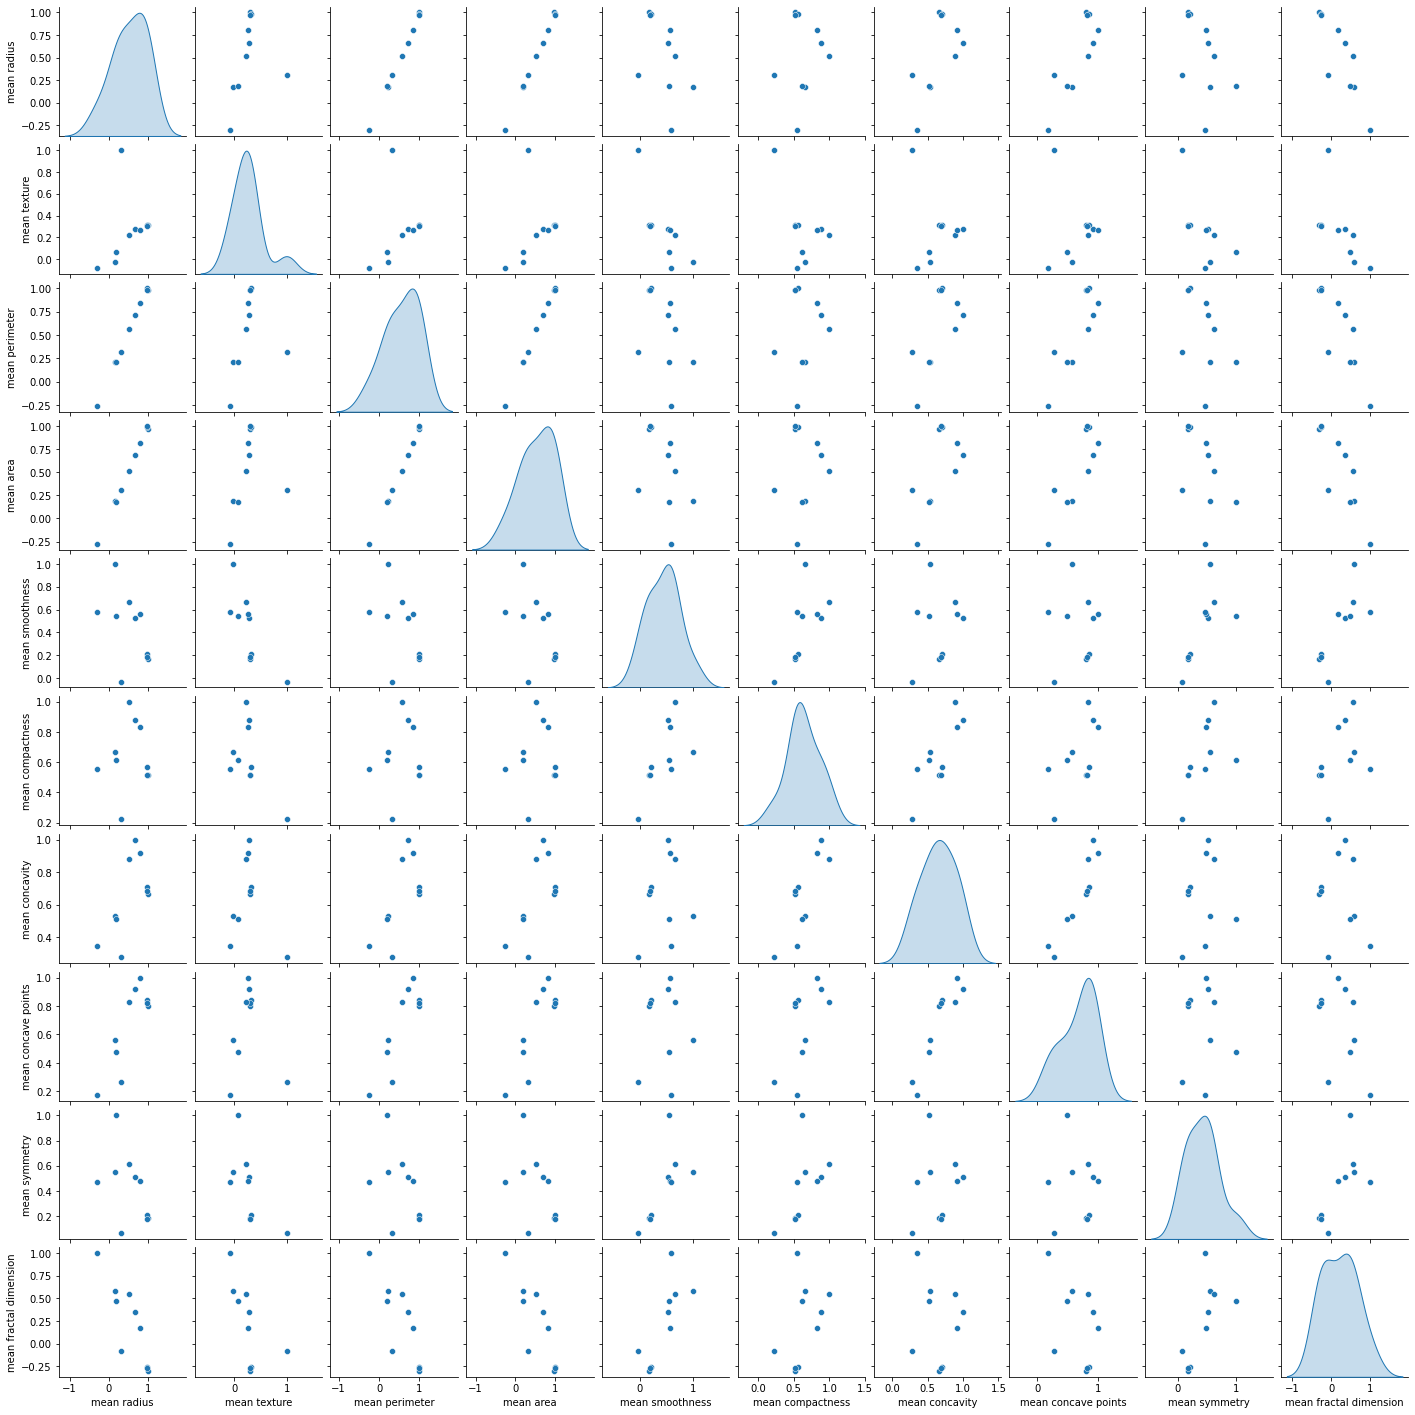

In [132]:
featureMeans = list(df_clean.columns[1:11])
correlationData = df_clean[featureMeans].corr()
sns.pairplot(df_clean[featureMeans].corr(), diag_kind='kde', size=2);

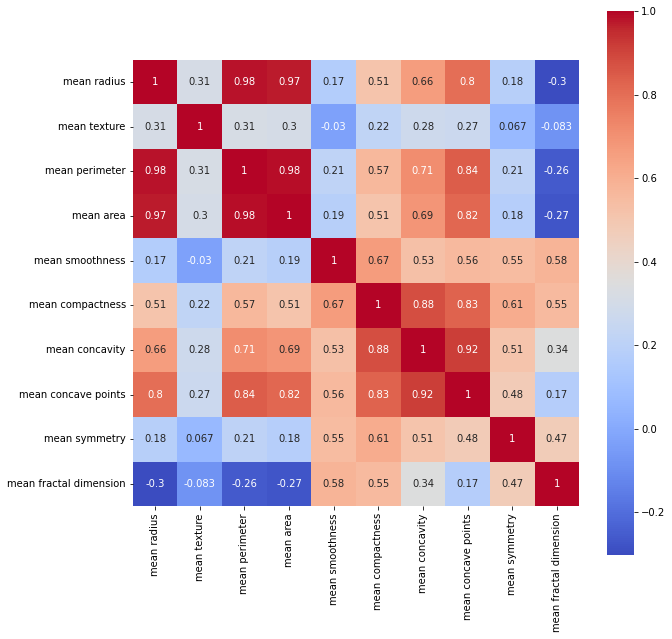

In [133]:
plt.figure(figsize=(10,10))
sns.heatmap(df_clean[featureMeans].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

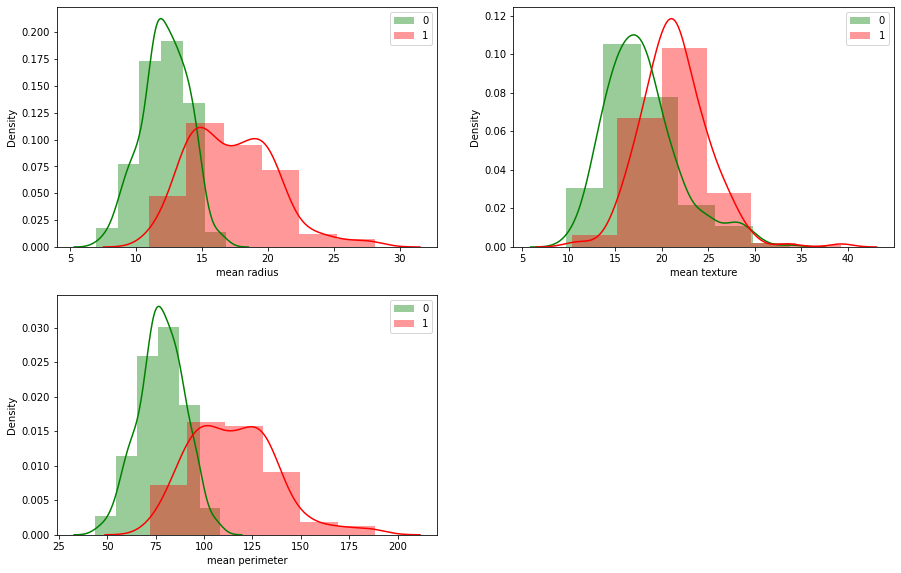

In [135]:
bins = 6
plt.figure(figsize=(15,15))
plt.subplot(3, 2, 1)
sns.distplot(df_clean[df_clean['target']==1]['mean radius'], bins=bins, color='green', label=0)
sns.distplot(df_clean[df_clean['target']==0]['mean radius'], bins=bins, color='red', label=1)
plt.legend(loc='upper right')
plt.subplot(3, 2, 2)
sns.distplot(df_clean[df_clean['target']==1]['mean texture'], bins=bins, color='green', label=0)
sns.distplot(df_clean[df_clean['target']==0]['mean texture'], bins=bins, color='red', label=1)
plt.legend(loc='upper right')
plt.subplot(3, 2, 3)
sns.distplot(df_clean[df_clean['target']==1]['mean perimeter'], bins=bins, color='green', label=0)
sns.distplot(df_clean[df_clean['target']==0]['mean perimeter'], bins=bins, color='red', label=1)
plt.legend(loc='upper right')
plt.show()